### Opening of new restaurant in the neighborhood.

___

**1. Introduction**  
&nbsp;&nbsp;&nbsp;&nbsp;Yelp [1][2] is a company which publishes crowd-sourced reviews about businessesusing the company website.Yelp dataset captures business data from all around the world.  Mainly this sitecaptures reviews related to business of various categories like Dentist, Restau-rant, etc.  Along with reviews, it lists location details of every business in Yelpdatabase.  
&nbsp;&nbsp;&nbsp;&nbsp;Success of new business depends on many factors.  Location is the key factorwhich should be considered while opening new business.  For this purpose, lo-cation attributes present in the Yelp dataset[4] will help find a place to start anew business.This  project  aim  to  help  investors/entrepreneur  to  find  an  appropriate  loca-tion for their prospective restaurant business.  With the help of Yelp Businessdataset and machine learning techniques like clustering, this project will locatetop 10 most common restaurant businesses in a neighborhood.  This will guideinvestors while opening a new restaurant business at particular location.

###### Libraries

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import requests
import numpy as np
#import gc
#gc.collect()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

___  
**2. Data description**  

**2.1 Data Acquisition**

For this problem below dataset were used:

1.  Business.csv will be used from Yelp Dataset.  This dataset is taken fromKaggel  website[3]  and  Yelp  dataset  website[4]. For modeling purpose, business with "Restaurant" as category are considered.
2. Forsquare API[5] was used to get the most common venues for above mentioned business and in Toronto area.


**2.2 Data Preprocessing**

&nbsp;&nbsp;&nbsp;&nbsp; For this project, Yelp Business data was loaded in the IBM Watson Studio and accordingly csv file was read in dataframe called businessDF.

In [10]:
# The code was removed by Watson Studio for sharing.

In [11]:
businessDF = pd.read_csv(body)

___ 
Few records from the Business.csv dataset after data cleaning.

In [12]:
print("Original businessDF has ",businessDF.shape[0] ," number of rows")
businessDF.dropna(inplace=True)
print("After data cleaning businessDF has ",businessDF.shape[0] ," number of rows")
businessDF.head()

Original businessDF has  174567  number of rows
After data cleaning businessDF has  67741  number of rows


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
12,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham Village,"""35 Main Street N""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,38,1,Bakeries;Bagels;Food
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional)
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants
20,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",Liberty Village,"""85 Hanna Avenue""",Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,21,1,Food;Coffee & Tea


___  
Below is the list of all features associated with every business entity.

In [7]:
businessDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67741 entries, 6 to 174561
Data columns (total 13 columns):
business_id     67741 non-null object
name            67741 non-null object
neighborhood    67741 non-null object
address         67741 non-null object
city            67741 non-null object
state           67741 non-null object
postal_code     67741 non-null object
latitude        67741 non-null float64
longitude       67741 non-null float64
stars           67741 non-null float64
review_count    67741 non-null int64
is_open         67741 non-null int64
categories      67741 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 7.2+ MB


___
**3. Methodology**

**3.1 Exploratory analysis**

&nbsp;&nbsp;&nbsp;&nbsp; For exploratory analysis, I used various visualization techniques. Libraries like wordcloud were used for better exploratory analysis.

In [13]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wordcloud:       1.4.1-py36_0      conda-forge

The following packages will be UPDATE

___  
**A. Different categories of business**  
&nbsp;&nbsp;&nbsp;&nbsp;First, data visualization technique was used to display different business categories available in the Yelp business dataset.

In [14]:
### Remove this
categoryText = " ".join(cat for cat in businessDF.categories)
#categoryText

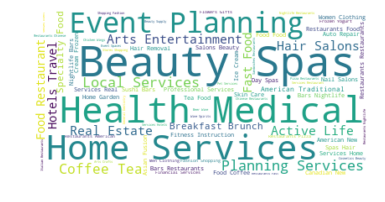

In [15]:

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(categoryText)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(categoryText)
plt.figure()


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; **Analysis:** Above word cloud shows various business categories captured in the Yelp database.

___  
**B. Analysis of the ratings of restaurants**  
&nbsp;&nbsp;&nbsp;&nbsp;Here onward only business with category as Restaurants are considered. The data frame restaurantBusinessDF captures only restaurant related business details. Average ratings of all the restaurants were compared using bar plot.

In [16]:
restaurantBusinessDF=businessDF.query('"Restaurants" in categories')
restaurantBusinessDF.head()
#newbusinessDF1 
restaurantBusinessDF.shape[0]

101

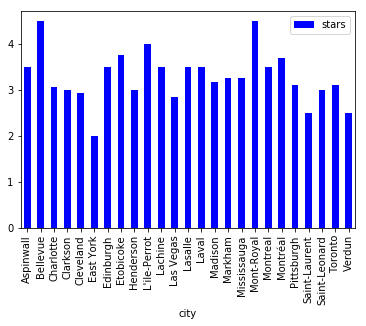

In [18]:
graphDF= restaurantBusinessDF.groupby('city').mean().reset_index()
graphDF.head()
graphDF.plot(kind='bar',x='city',y='stars',color='blue')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; **Analysis:** From the above bar plot, we can identify city namely Mont-Royal and Bellevue has achieved highest ratings for Restaurant business.

___ 
**3.2 Exploration of neighborhood using Forsquare API**  
Forsquare Credentials set to explore nearby venues.

In [19]:
# The code was removed by Watson Studio for sharing.

Client ID, secret and version is set for Forsquare.


___ 
Functions to iterate over all the Restaurants data to get nearby venues.

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
print("Start: Exploring nearby venues.")
nearby_venues = getNearbyVenues(names=restaurantBusinessDF['neighborhood'],latitudes=restaurantBusinessDF['latitude'],longitudes=restaurantBusinessDF['longitude'] )

print("End: Nearby Venues data is retrieved.\n")
print('There are {} uniques venue categories .'.format(len(nearby_venues['Venue Category'].unique())))

Start: Exploring nearby venues.
Ville-Marie
East York
Downtown
Regent
Cooksville
Birchwood
Yonge and Eglinton
NoDa
Capitol
Capitol
Sud-Ouest
Lakeview
Laval
Ville-Marie
Notre-Dame-de-Grâce
University
Mt. Oliver
Shadyside
Ville-Marie
Westside
Ville-Marie
Plateau-Mont-Royal
Bellevue
Dilworth
Notre-Dame-de-Grâce
The Strip
The Strip
West Bank
Ville-Marie
Saint-Léonard
Ohio City
Warehouse District
Etobicoke
Rosemont-La Petite-Patrie
The Junction
Plateau-Mont-Royal
Mercier-Hochelaga-Maisonneuve
Unionville
Royal Mile
Verdun
Ville-Marie
Ballantyne
Downtown Core
Mont-Royal
North Side
Stockyards
East Credit
Ville-Marie
Eastside
Uptown
Southeast
Centennial
Northwest
Ile-Perrot
Regent
Ahuntsic-Cartierville
Newington
Mount Pleasant and Davisville
Yonge and St. Clair
Ballantyne
Eastside
Etobicoke
Starmount
The Strip
West Boulevard
Scarborough
Gateway District
West Queen West
Ville-Marie
Downtown
Old Town
Old Malton Village
Old Town
Anthem
Saint-Laurent
Lachine
Northwest
Spring Valley
Aspinwall
Viller

In [23]:
nearby_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ville-Marie,45.502755,-73.571472,Empire,45.503952,-73.571840,Sporting Goods Shop
1,Ville-Marie,45.502755,-73.571472,Tunnel Espresso,45.502167,-73.569954,Coffee Shop
2,Ville-Marie,45.502755,-73.571472,NStyle Beauty Lounge,45.502028,-73.572247,Spa
3,Ville-Marie,45.502755,-73.571472,Hôtel Le Germain Montréal - NOW OPEN,45.502524,-73.574383,Hotel
4,Ville-Marie,45.502755,-73.571472,WeWork Place Ville Marie,45.502060,-73.569340,Coworking Space


In [24]:
#Let's check how many venues were returned for each neighorhood
nearby_venues.groupby(["Neighborhood"]).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ahuntsic-Cartierville,32,32,32,32,32,32
Anthem,51,51,51,51,51,51
Aspinwall,10,10,10,10,10,10
Ballantyne,22,22,22,22,22,22
Bellevue,6,6,6,6,6,6
Birchwood,14,14,14,14,14,14
Capitol,356,356,356,356,356,356
Centennial,4,4,4,4,4,4
Cooksville,8,8,8,8,8,8


In [25]:
# one hot encoding
venues_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = nearby_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Yoga Studio,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,...,Video Store,Vietnamese Restaurant,Volcano,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Group venues
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Aquarium,...,Video Store,Vietnamese Restaurant,Volcano,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Ahuntsic-Cartierville,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,...,0.000000,0.03125,0.0,0.0,0.03125,0.0,0.0,0.0,0.0,0.03125
1,Anthem,0.0,0.0,0.0,0.0,0.0,0.0,0.078431,0.0,0.0,...,0.019608,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000
2,Aspinwall,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,...,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000
3,Ballantyne,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.045455,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000
4,Bellevue,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.333333,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000


In [30]:

nearby_restaurant_venues_DF=venues_grouped[venues_grouped.columns[pd.Series(venues_grouped.columns).str.endswith("Restaurant")]]
nearby_restaurant_venues_DF['Neighborhood'] = venues_grouped['Neighborhood']


#Move the neighborhood column to first
cols = list(nearby_restaurant_venues_DF.columns)
cols = [cols[-1]] + cols[:-1]
nearby_restaurant_venues_DF = nearby_restaurant_venues_DF[cols]
nearby_restaurant_venues_DF

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Bavarian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Ahuntsic-Cartierville,0.000000,0.0,0.031250,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250
1,Anthem,0.000000,0.0,0.078431,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Aspinwall,0.000000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Ballantyne,0.000000,0.0,0.045455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bellevue,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000
5,Birchwood,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Capitol,0.000000,0.0,0.042135,0.030899,0.000000,0.0,0.000000,0.000000,0.008427,...,0.008427,0.000000,0.000000,0.002809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Centennial,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Cooksville,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Dilworth,0.000000,0.0,0.000000,0.037736,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.018868,0.000000


In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


___ 
With help of Forsquare API and Forsquare developer account, neighborhood area of restaurant businesses derived from the Yelp Business data was explored. Area with radius of 500 meters was explored to get nearby venues. Different categories of the venues data was acquired with help of Forsqaure exploration technique. As main aim of this project to guide investors to find better location for their potential restaurant business, I have consider only nearby restaurant venues. Using various function of pandas dataframe, top 10 common restaurants in each neighborhood were identified.

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

#neighborhoods_venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']
#Test
neighborhoods_venues_sorted['Neighborhood'] = nearby_restaurant_venues_DF['Neighborhood']

#for ind in np.arange(venues_grouped.shape[0]):
    #neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

for ind in np.arange(nearby_restaurant_venues_DF.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nearby_restaurant_venues_DF.iloc[ind, :], num_top_venues)
print("Top 10 common restaurant identified.")
neighborhoods_venues_sorted.head()


Top 10 common restaurant identified.


,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Ahuntsic-Cartierville,Middle Eastern Restaurant,Vietnamese Restaurant,Greek Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Sushi Restaurant,Thai Restaurant,American Restaurant,Hawaiian Restaurant
1,Anthem,Italian Restaurant,American Restaurant,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant,Restaurant,Hawaiian Restaurant,Greek Restaurant,Hong Kong Restaurant,English Restaurant
2,Aspinwall,American Restaurant,New American Restaurant,Vietnamese Restaurant,English Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Greek Restaurant
3,Ballantyne,Japanese Restaurant,American Restaurant,Tapas Restaurant,Restaurant,German Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
4,Bellevue,Thai Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant


___ 
**3.3 Clustering**  
Machine learning technique like clustering was used in this project. The top common restaurants from each area were grouped using clustering. K-means clustering was used to cluster the neighborhood in 3 clusters. This helped us to identify, which neighborhood has highest number of restaurants of similar kind. Based on these details, this project will try to find better location for the potential restaurant business.

In [43]:
# set number of clusters
kclusters = 3

grouped_clustering = nearby_restaurant_venues_DF.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [44]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

merged_data = restaurantBusinessDF #newbusinessDF1
neighborhoods_venues_sorted.columns
merged_data.columns
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged_data = merged_data.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

In [45]:
merged_data.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories', 'Cluster Labels', '1st Most Common Restaurant',
       '2nd Most Common Restaurant', '3rd Most Common Restaurant',
       '4th Most Common Restaurant', '5th Most Common Restaurant',
       '6th Most Common Restaurant', '7th Most Common Restaurant',
       '8th Most Common Restaurant', '9th Most Common Restaurant',
       '10th Most Common Restaurant'],
      dtype='object')

In [46]:
merged_data[['business_id', 'name', 'neighborhood',
      'latitude', 'longitude', 'Cluster Labels', '1st Most Common Restaurant',
       '2nd Most Common Restaurant', '3rd Most Common Restaurant',
       '4th Most Common Restaurant', '5th Most Common Restaurant',
       '6th Most Common Restaurant', '7th Most Common Restaurant',
       '8th Most Common Restaurant', '9th Most Common Restaurant',
       '10th Most Common Restaurant']]

,business_id,name,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
944,vZbcZDWqIvHmUtS3Pky1tA,"""Edo Japon""",Ville-Marie,45.502755,-73.571472,1,Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Comfort Food Restaurant,Hawaiian Restaurant,Sushi Restaurant
1567,Gg0DVuNGaqUVFPVrrFQd6Q,"""Wing Wing Restaurant""",East York,43.690876,-79.289938,1,Sushi Restaurant,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Eastern European Restaurant
2711,BpU9-wcOWyKcVtkvnfRazA,"""Wok & Grill""",Downtown,40.441888,-80.003443,1,American Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Mediterranean Restaurant,Thai Restaurant,Korean Restaurant,Chinese Restaurant,Seafood Restaurant,New American Restaurant
3105,KLJmSYpq81fy0gXri-tAAw,"""Firefly""",Regent,43.073145,-89.434402,1,French Restaurant,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Eastern European Restaurant,Greek Restaurant
4244,FHm69MlMvFv0rW-esmut-g,"""Sijan Plaza Restaurant""",Cooksville,43.584377,-79.621065,1,Indian Restaurant,Korean Restaurant,Portuguese Restaurant,Mexican Restaurant,Caribbean Restaurant,Vietnamese Restaurant,German Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
5304,TXNDK-DRjx2cfu7amxcIIA,"""Souvlaki Hut""",Birchwood,43.517902,-79.622844,1,Italian Restaurant,Sushi Restaurant,Greek Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Vietnamese Restaurant
7856,21QPpgP86hABa5ZmfLvooA,"""Freshii""",Yonge and Eglinton,43.707425,-79.399071,1,Italian Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Ramen Restaurant,Caribbean Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Middle Eastern Restaurant
12357,wlRFPldYNvhGJVFwRjGN_A,"""Tryon House Restaurant""",NoDa,35.258723,-80.777659,1,American Restaurant,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,German Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
17343,K7rmxZmtoE0_U_40459TLg,"""Sucre""",Capitol,43.075216,-89.386276,1,American Restaurant,New American Restaurant,Asian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Dim Sum Restaurant,Seafood Restaurant,Persian Restaurant,Caribbean Restaurant
18561,3QkeQGsghxmtHyK2q1_xsQ,"""CoCoLiquot""",Capitol,43.074402,-89.379518,1,American Restaurant,New American Restaurant,Asian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Dim Sum Restaurant,Seafood Restaurant,Persian Restaurant,Caribbean Restaurant


___
**4. Result**  
Visualize the clusters

In [36]:

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0           conda-forge
    geopy:         1.22.0-pyh9f0ad1d_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.22.0         | 63 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


In [38]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


altair-4.1.0         | 614 KB    | ##################################### | 1

In [47]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


___

For better understanding,the result of clustering is shown in map for the Toronto area. From the map it is clear that, neighborhood is divided in 3 different cluster.  

Cluster 0 : is represented with red colour and has moderate number of restaurants.  
Cluster 1 : is represented with purple colour and has highest number of restaurants.  
Cluster 2 : is represented with green colour and has few restaurants.


In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_data['latitude'], merged_data['longitude'], merged_data['neighborhood'], merged_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [49]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

___
**5. Discussion** 

Examining the clusters

In [54]:
# Cluster wise count of restaurants
cols1=['Cluster','Restaurant count']
cluster_DF=pd.DataFrame(columns=cols1)
#rows = [[0,merged_data[merged_data['Cluster Labels'] == 0].shape[0]],[1,merged_data[merged_data['Cluster Labels'] == 1].shape[0]],[2,merged_data[merged_data['Cluster Labels'] == 2].shape[0]],[3,merged_data[merged_data['Cluster Labels'] == 3].shape[0]],[4,merged_data[merged_data['Cluster Labels'] == 4].shape[0]]]
rows = [[0,merged_data[merged_data['Cluster Labels'] == 0].shape[0]],[1,merged_data[merged_data['Cluster Labels'] == 1].shape[0]],[2,merged_data[merged_data['Cluster Labels'] == 2].shape[0]]]
for row in rows:
    cluster_DF.loc[len(cluster_DF)] = row

cluster_DF


,Cluster,Restaurant count
0,0,15
1,1,84
2,2,2


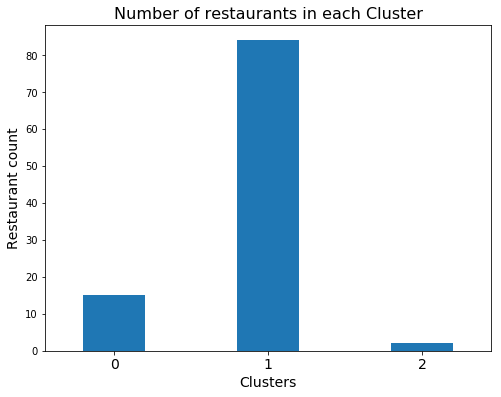

In [64]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cluster_DF['Restaurant count'].plot(kind='bar',figsize=(8,6),width = 0.4)

plt.title("Number of restaurants in each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Restaurant count', fontsize=14)

plt.show()



&nbsp;&nbsp;&nbsp;&nbsp; **Analysis:** From the above bar plot, we can say most of the restaurants are in the neighborhood which belong to cluster 1. In total, 84 restaurants are in cluster 1. With this information we can advise new business owners to avoid neighborhood area which belongs to cluster 1 while opening their prospective restaurant's business. On the other hand Cluster 0 and 2 has a handful of restaurants and it gives an excellent opportunity to start a new business.

&nbsp;&nbsp;&nbsp;&nbsp;Further cluster analysis provides detailed information on Top 10 restaurant in each cluster along with neighborhood area in which they live. With this information, the potential business owner is notified with potential competitors in the neighborhood. Cluster 1 has restaurants of type Italian, Indian, Korean etc. Upon comparison of cluster 0 with cluster 1, we can say that more fast-food restaurants are listed in a neighborhood which belongs to cluster 0. So if an investor is looking to open Fast-food restaurant then neighborhood which belongs to cluster 1 or 2 will be of good choice rather than cluster 0.

**Cluster 0**

In [51]:
merged_data.loc[merged_data['Cluster Labels'] == 0, merged_data.columns[[1] + list(range(5, merged_data.shape[1]))]]

,name,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
20616,"""Select Grill""",ON,L5E 1V4,43.592864,-79.567192,4.0,7,1,Restaurants,0,Fast Food Restaurant,Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant
30080,"""Unlv Dining""",NV,89119,36.105315,-115.138874,2.5,9,1,Restaurants,0,Fast Food Restaurant,Mexican Restaurant,Asian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Greek Restaurant,Italian Restaurant,Thai Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant
45090,"""Dejeuner Eggcetera""",QC,H1S 1M8,45.591377,-73.575669,3.0,6,0,Restaurants,0,Fast Food Restaurant,Sushi Restaurant,Asian Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant
66723,"""Villa Armando""",QC,H3R 1K1,45.508986,-73.660649,4.5,7,1,Restaurants,0,Fast Food Restaurant,Italian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Greek Restaurant
67560,"""Mr Hero""",OH,44102,41.462511,-81.737379,2.5,3,1,Restaurants,0,Fast Food Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant
78337,"""Kopper Keg Restaurant & Lounge""",NV,89121,36.100364,-115.074610,4.0,4,1,Restaurants,0,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,English Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant
80338,"""Wild Horse Cafe""",NV,89130,36.219894,-115.215478,2.5,3,0,Restaurants,0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,English Restaurant,Iraqi Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant
82520,"""Restaurant Mama Bravo""",QC,J7V 4X4,45.387662,-73.966126,4.0,7,1,Restaurants,0,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Falafel Restaurant,French Restaurant,Restaurant,English Restaurant,Ethiopian Restaurant,German Restaurant,Gluten-free Restaurant
100223,"""Sub Station II""",NC,28217,35.135719,-80.878744,3.5,3,0,Restaurants,0,Fast Food Restaurant,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Asian Restaurant,Vietnamese Restaurant,Falafel Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant
125891,"""Original Pancake House""",NV,89129,36.219152,-115.281428,4.0,9,0,Restaurants,0,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,English Restaurant,Iraqi Restaurant,Indonesian Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant


**Cluster 1**

In [52]:
merged_data.loc[merged_data['Cluster Labels'] == 1, merged_data.columns[[1] + list(range(5, merged_data.shape[1]))]]

,name,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
944,"""Edo Japon""",QC,H3B 4G5,45.502755,-73.571472,4.5,7,1,Restaurants,1,Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Portuguese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Comfort Food Restaurant,Hawaiian Restaurant,Sushi Restaurant
1567,"""Wing Wing Restaurant""",ON,M4C 1N2,43.690876,-79.289938,2.0,5,1,Restaurants,1,Sushi Restaurant,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Falafel Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Eastern European Restaurant
2711,"""Wok & Grill""",PA,15222,40.441888,-80.003443,3.0,3,1,Restaurants,1,American Restaurant,Italian Restaurant,Restaurant,Mexican Restaurant,Mediterranean Restaurant,Thai Restaurant,Korean Restaurant,Chinese Restaurant,Seafood Restaurant,New American Restaurant
3105,"""Firefly""",WI,53705,43.073145,-89.434402,1.5,5,0,Restaurants,1,French Restaurant,Italian Restaurant,Thai Restaurant,Mexican Restaurant,Indian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Eastern European Restaurant,Greek Restaurant
4244,"""Sijan Plaza Restaurant""",ON,L5A 1Y5,43.584377,-79.621065,2.5,3,1,Restaurants,1,Indian Restaurant,Korean Restaurant,Portuguese Restaurant,Mexican Restaurant,Caribbean Restaurant,Vietnamese Restaurant,German Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
5304,"""Souvlaki Hut""",ON,L5J 1J4,43.517902,-79.622844,4.5,7,1,Restaurants,1,Italian Restaurant,Sushi Restaurant,Greek Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Vietnamese Restaurant
7856,"""Freshii""",ON,M4P 2W6,43.707425,-79.399071,3.0,13,1,Restaurants,1,Italian Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant,Ramen Restaurant,Caribbean Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Middle Eastern Restaurant
12357,"""Tryon House Restaurant""",NC,28213,35.258723,-80.777659,3.5,5,1,Restaurants,1,American Restaurant,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,German Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
17343,"""Sucre""",WI,53703,43.075216,-89.386276,3.5,3,0,Restaurants,1,American Restaurant,New American Restaurant,Asian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Dim Sum Restaurant,Seafood Restaurant,Persian Restaurant,Caribbean Restaurant
18561,"""CoCoLiquot""",WI,53703,43.074402,-89.379518,3.5,7,0,Restaurants,1,American Restaurant,New American Restaurant,Asian Restaurant,Italian Restaurant,Restaurant,Korean Restaurant,Dim Sum Restaurant,Seafood Restaurant,Persian Restaurant,Caribbean Restaurant


**Cluster 2**

In [53]:
merged_data.loc[merged_data['Cluster Labels'] == 2, merged_data.columns[[1] + list(range(5, merged_data.shape[1]))]]

,name,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
104611,"""Tung Tung Company Ltd""",ON,M1S 2B7,43.786927,-79.274071,4.0,4,1,Restaurants,2,Chinese Restaurant,Cantonese Restaurant,Vietnamese Restaurant,Hong Kong Restaurant,Restaurant,Asian Restaurant,Korean Restaurant,Indian Chinese Restaurant,Hawaiian Restaurant,Indian Restaurant
115914,"""Airport Grill""",ON,L4T 2G8,43.704298,-79.643906,2.5,4,1,Restaurants,2,Indian Restaurant,Chinese Restaurant,Japanese Restaurant,Eastern European Restaurant,Indonesian Restaurant,Indian Chinese Restaurant,Hong Kong Restaurant,Hawaiian Restaurant,Greek Restaurant,Gluten-free Restaurant


___
**6. Conclusion and future work**  
With this project, we can guide investors to find an appropriate location for their prospective restaurant business. Machine learning and visualization techniques gives better information to the investors. Interactive GUI could be future work for this project.

**References**  
[1]  https://en.wikipedia.org/wiki/Yelp  
[2]  https://www.yelp.com/about  
[3]  https://www.kaggle.com  
[4]  https://www.yelp.com/dataset/documentation/main  
[5]  https://foursquare.com/